In [1]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data Augumentation
import cv2
import numpy as np
import time
from pygame import mixer
import serial

pygame 2.1.2 (SDL 2.0.18, Python 3.9.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
batchsize=8

In [3]:
train_datagen= ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2, validation_split=0.2)

train_data= train_datagen.flow_from_directory(r'Prepared Data\train',
                                target_size=(80,80),batch_size=batchsize,class_mode='binary',subset='training' )

validation_data= train_datagen.flow_from_directory(r'Prepared Data\train',
                                target_size=(80,80),batch_size=batchsize,class_mode='binary', subset='validation')


Found 65884 images belonging to 2 classes.
Found 16470 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(r'Prepared Data\test',
                                target_size=(80,80),batch_size=batchsize,class_mode='binary', shuffle=False)

Found 4872 images belonging to 2 classes.


In [36]:
bmodel = InceptionV3(include_top=False, 
                     weights='imagenet', 
                     input_tensor=Input(shape=(80,80,3)))
hmodel = bmodel.output
hmodel = Flatten()(hmodel)
hmodel = Dense(64, activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(1,activation= 'sigmoid')(hmodel)

model = Model(inputs=bmodel.input, outputs= hmodel)
for layer in bmodel.layers:
    layer.trainable = False

In [37]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 80, 80, 3)]  0           []                               
                                                                                                  
 conv2d_282 (Conv2D)            (None, 39, 39, 32)   864         ['input_4[0][0]']                
                                                                                                  
 batch_normalization_282 (Batch  (None, 39, 39, 32)  96          ['conv2d_282[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_282 (Activation)    (None, 39, 39, 32)   0           ['batch_normalization_282[0

                                                                                                  
 batch_normalization_292 (Batch  (None, 7, 7, 96)    288         ['conv2d_292[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_293 (Batch  (None, 7, 7, 32)    96          ['conv2d_293[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_287 (Activation)    (None, 7, 7, 64)     0           ['batch_normalization_287[0][0]']
                                                                                                  
 activation_289 (Activation)    (None, 7, 7, 64)     0           ['batch_normalization_289[0][0]']
          

                                                                                                  
 conv2d_302 (Conv2D)            (None, 7, 7, 48)     13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_305 (Conv2D)            (None, 7, 7, 96)     55296       ['activation_304[0][0]']         
                                                                                                  
 batch_normalization_302 (Batch  (None, 7, 7, 48)    144         ['conv2d_302[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_305 (Batch  (None, 7, 7, 96)    288         ['conv2d_305[0][0]']             
 Normalization)                                                                                   
          

                                                                  'activation_311[0][0]',         
                                                                  'max_pooling2d_14[0][0]']       
                                                                                                  
 conv2d_316 (Conv2D)            (None, 3, 3, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_316 (Batch  (None, 3, 3, 128)   384         ['conv2d_316[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_316 (Activation)    (None, 3, 3, 128)    0           ['batch_normalization_316[0][0]']
                                                                                                  
 conv2d_31

 batch_normalization_326 (Batch  (None, 3, 3, 160)   480         ['conv2d_326[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_326 (Activation)    (None, 3, 3, 160)    0           ['batch_normalization_326[0][0]']
                                                                                                  
 conv2d_327 (Conv2D)            (None, 3, 3, 160)    179200      ['activation_326[0][0]']         
                                                                                                  
 batch_normalization_327 (Batch  (None, 3, 3, 160)   480         ['conv2d_327[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 conv2d_337 (Conv2D)            (None, 3, 3, 160)    179200      ['activation_336[0][0]']         
                                                                                                  
 batch_normalization_337 (Batch  (None, 3, 3, 160)   480         ['conv2d_337[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_337 (Activation)    (None, 3, 3, 160)    0           ['batch_normalization_337[0][0]']
                                                                                                  
 conv2d_333 (Conv2D)            (None, 3, 3, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_338 (Conv2D)            (None, 3, 3, 160)    179200      ['activation_337[0][0]']         
          

 activation_347 (Activation)    (None, 3, 3, 192)    0           ['batch_normalization_347[0][0]']
                                                                                                  
 conv2d_343 (Conv2D)            (None, 3, 3, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_348 (Conv2D)            (None, 3, 3, 192)    258048      ['activation_347[0][0]']         
                                                                                                  
 batch_normalization_343 (Batch  (None, 3, 3, 192)   576         ['conv2d_343[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_348 (Batch  (None, 3, 3, 192)   576         ['conv2d_348[0][0]']             
 Normaliza

                                                                                                  
 batch_normalization_352 (Batch  (None, 3, 3, 192)   576         ['conv2d_352[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_356 (Batch  (None, 3, 3, 192)   576         ['conv2d_356[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_352 (Activation)    (None, 3, 3, 192)    0           ['batch_normalization_352[0][0]']
                                                                                                  
 activation_356 (Activation)    (None, 3, 3, 192)    0           ['batch_normalization_356[0][0]']
          

 activation_360 (Activation)    (None, 1, 1, 384)    0           ['batch_normalization_360[0][0]']
                                                                                                  
 activation_361 (Activation)    (None, 1, 1, 384)    0           ['batch_normalization_361[0][0]']
                                                                                                  
 activation_364 (Activation)    (None, 1, 1, 384)    0           ['batch_normalization_364[0][0]']
                                                                                                  
 activation_365 (Activation)    (None, 1, 1, 384)    0           ['batch_normalization_365[0][0]']
                                                                                                  
 batch_normalization_366 (Batch  (None, 1, 1, 192)   576         ['conv2d_366[0][0]']             
 Normalization)                                                                                   
          

 activation_374 (Activation)    (None, 1, 1, 384)    0           ['batch_normalization_374[0][0]']
                                                                                                  
 batch_normalization_375 (Batch  (None, 1, 1, 192)   576         ['conv2d_375[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_367 (Activation)    (None, 1, 1, 320)    0           ['batch_normalization_367[0][0]']
                                                                                                  
 mixed9_1 (Concatenate)         (None, 1, 1, 768)    0           ['activation_369[0][0]',         
                                                                  'activation_370[0][0]']         
                                                                                                  
 concatena

In [38]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

In [71]:
checkpoint = ModelCheckpoint(r'F:\Deep Learning\Drowsiness Detection\models\model.h5',
                            monitor='val_loss',save_best_only=True,verbose=3)

earlystop = EarlyStopping(monitor = 'val_loss', patience=50, verbose= 3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=3, verbose= 3, )

callbacks=[checkpoint,earlystop,learning_rate]

In [73]:
model.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])

batchsize=8
train_model = model.fit(train_data,steps_per_epoch=train_data.samples//batchsize,
                   validation_data=validation_data,
                   validation_steps=validation_data.samples//batchsize,
                   callbacks=callbacks,
                    epochs=50)

Epoch 1/50
8235/8235 [==============================] - ETA: 0s - loss: 0.1591 - accuracy: 0.9389
Epoch 1: val_loss improved from inf to 0.25015, saving model to F:\Deep Learning\Drowsiness Detection\models\model.h5
8235/8235 [==============================] - 764s 92ms/step - loss: 0.1591 - accuracy: 0.9389 - val_loss: 0.2501 - val_accuracy: 0.8972 - lr: 0.0010
Epoch 2/50
8235/8235 [==============================] - ETA: 0s - loss: 0.1546 - accuracy: 0.9404
Epoch 2: val_loss did not improve from 0.25015
8235/8235 [==============================] - 740s 90ms/step - loss: 0.1546 - accuracy: 0.9404 - val_loss: 0.2554 - val_accuracy: 0.8906 - lr: 0.0010
Epoch 3/50
8235/8235 [==============================] - ETA: 0s - loss: 0.1535 - accuracy: 0.9404
Epoch 3: val_loss improved from 0.25015 to 0.24384, saving model to F:\Deep Learning\Drowsiness Detection\models\model.h5
8235/8235 [==============================] - 744s 90ms/step - loss: 0.1535 - accuracy: 0.9404 - val_loss: 0.2438 - val_ac

Epoch 26/50
8235/8235 [==============================] - ETA: 0s - loss: 0.1291 - accuracy: 0.9525
Epoch 26: val_loss did not improve from 0.23382
8235/8235 [==============================] - 740s 90ms/step - loss: 0.1291 - accuracy: 0.9525 - val_loss: 0.2439 - val_accuracy: 0.9063 - lr: 1.0000e-08
Epoch 27/50
8235/8235 [==============================] - ETA: 0s - loss: 0.1307 - accuracy: 0.9504
Epoch 27: val_loss did not improve from 0.23382
8235/8235 [==============================] - 749s 91ms/step - loss: 0.1307 - accuracy: 0.9504 - val_loss: 0.2560 - val_accuracy: 0.9040 - lr: 1.0000e-08
Epoch 28/50
8235/8235 [==============================] - ETA: 0s - loss: 0.1309 - accuracy: 0.9509
Epoch 28: val_loss did not improve from 0.23382

Epoch 28: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-09.
8235/8235 [==============================] - 750s 91ms/step - loss: 0.1309 - accuracy: 0.9509 - val_loss: 0.2590 - val_accuracy: 0.9028 - lr: 1.0000e-08
Epoch 29/50
8235/8235 

In [77]:
val_loss , val_accuracy = model.evaluate(validation_data)
print(val_accuracy)
print(val_loss)

2059/2059 [==============================] - 182s 88ms/step - loss: 0.2545 - accuracy: 0.9053
0.9053430557250977
0.2544623017311096


In [89]:
train_loss , train_accuracy = model.evaluate(train_data)
print(train_accuracy)
print(train_loss)

8236/8236 [==============================] - 776s 94ms/step - loss: 0.1171 - accuracy: 0.9558
0.9558314681053162
0.11714517325162888


In [90]:
test_loss , test_accuracy = model.evaluate(test_data)
print(test_accuracy)
print(test_loss)

609/609 [==============================] - 50s 82ms/step - loss: 0.5210 - accuracy: 0.8598
0.8598111867904663
0.5209910869598389


In [69]:
%matplotlib inline 
from sklearn.metrics import confusion_matrix
import itertools 
import numpy as np
import pandas as pd

In [79]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')


In [87]:
Y_pred = model.predict(test_data, 4872  // batchsize+1)
y_pred = np.round_(Y_pred)
print('Confusion Matrix')
print(confusion_matrix(test_data.classes, y_pred))
print('Classification Report')
target_names = ['Close Eyes', 'Open Eyes']
print(classification_report(test_data.classes, y_pred, target_names=target_names))

609/609 [==============================] - 45s 74ms/step
Confusion Matrix
[[2527   17]
 [ 666 1662]]
Classification Report
              precision    recall  f1-score   support

  Close Eyes       0.79      0.99      0.88      2544
   Open Eyes       0.99      0.71      0.83      2328

    accuracy                           0.86      4872
   macro avg       0.89      0.85      0.86      4872
weighted avg       0.89      0.86      0.86      4872



In [86]:
y_pred = np.round_(Y_pred)
for i in y_pred:
    print(i)

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[1.]
[1.]
[1.]
[0.]
[1.]
[0.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[0.]
[1.]
[1.]
[0.]
[0.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[0.]
[0.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[0.]
[0.]
[0.]
[1.]
[1.]
[0.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[0.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[0.]
[0.]
[0.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[0.]
[1.]
[0.]
[1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[1.]
[0.]
[0.]
[0.]
[0.]
[1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[1.]
[1.]
[1.]
[0.]
[1.]
[0.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]


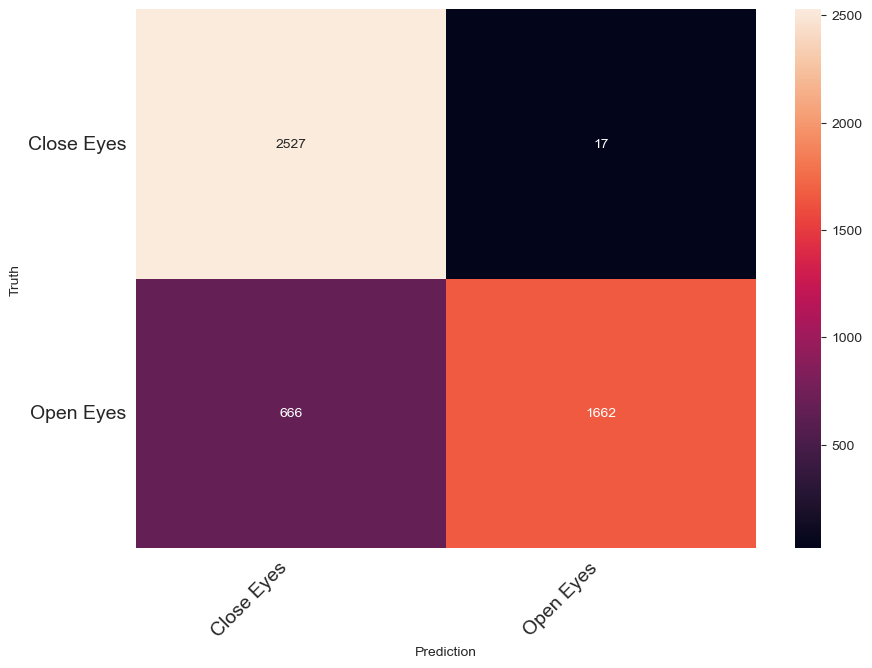

In [88]:
cm = confusion_matrix(test_data.classes, y_pred)
print_confusion_matrix(cm,["Close Eyes","Open Eyes"])

In [74]:
import matplotlib.pyplot as plt

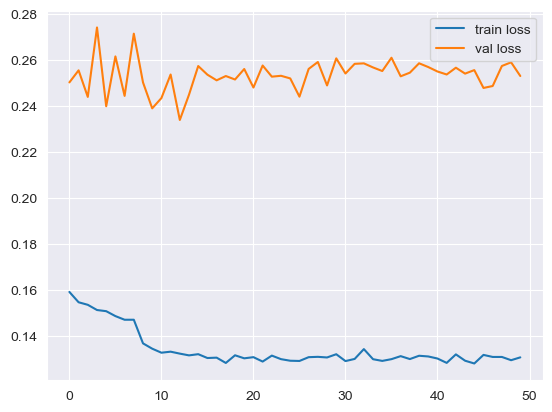

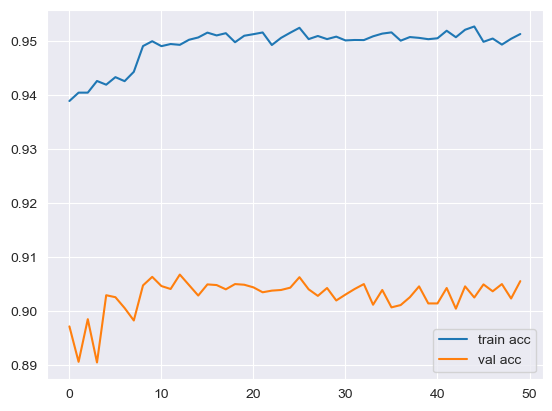

<Figure size 640x480 with 0 Axes>

In [75]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')